# customer transaction prediction

Team ID PTID-CDS-NOV-221422
Team members:JOE K PULIKOTTIL, AMALJITH C.A, AKSHAY SHA I.S

## Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the bank to identify which
customer will make transactions in future.

## Dataset Description:
Identify which customers will make a specific transaction in the future, irrespective of the
amount of money transacted. The data provided has the same structure as the real data to solve this
problem.

## Attribute Information:
The dataset is anonymized so we cannot know which feature is what.
There are a total of 200 features in this data set along with ID_code
and target columns. The target columns contain 0 and 1 value where 0
means the customer will not do a transaction and 1 means the
customer will do a transaction.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm 
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB

In [2]:
Data= pd.read_csv('train(1).csv')
Data.head()


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


## Data exploration

#### check the data
lets check the train data 

In [3]:
Data=Data.drop('ID_code',axis=1)

In [4]:
Data.shape

(200000, 201)

In [5]:
Data.dtypes

target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 201, dtype: object

In [6]:
Data.isnull().sum()

target     0
var_0      0
var_1      0
var_2      0
var_3      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64

In [7]:
feature_with_na=[feature for feature in Data.columns if Data[feature].isnull().sum()>1]
feature_with_na

[]

so from above code we get know that there is no missing values in data set

In [8]:
Data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


We can make few observations here:

. standard deviation is relatively large for train variable data

. min, max, mean, sdt values for train and test data looks quite close


. mean values are distributed over a large range.



## check whether the feature is normally distributed or not

In [9]:
alpha = 1e-3
all_normal = True
for feature in tqdm(Data.columns):
    if stats.normaltest(Data[feature].values).pvalue > alpha:
        all_normal = False
        print(f'{feature} may not be normal')
if all_normal:
    print('All features are normally distributed')

100%|███████████████████████████████████████████████████████████████████████████████| 201/201 [00:01<00:00, 166.15it/s]

All features are normally distributed


### lets check the distribution of target value in train data set.

In [10]:
# sns.countplot(train_df['target'])

In [11]:
# print('there are {}% target value with 1'.format(100*train_df['target'].value_counts()[1]/train_df.shape[0]))

The data is unbalanced with respect with target value

In [12]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        plt.legend()
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

<Figure size 432x288 with 0 Axes>

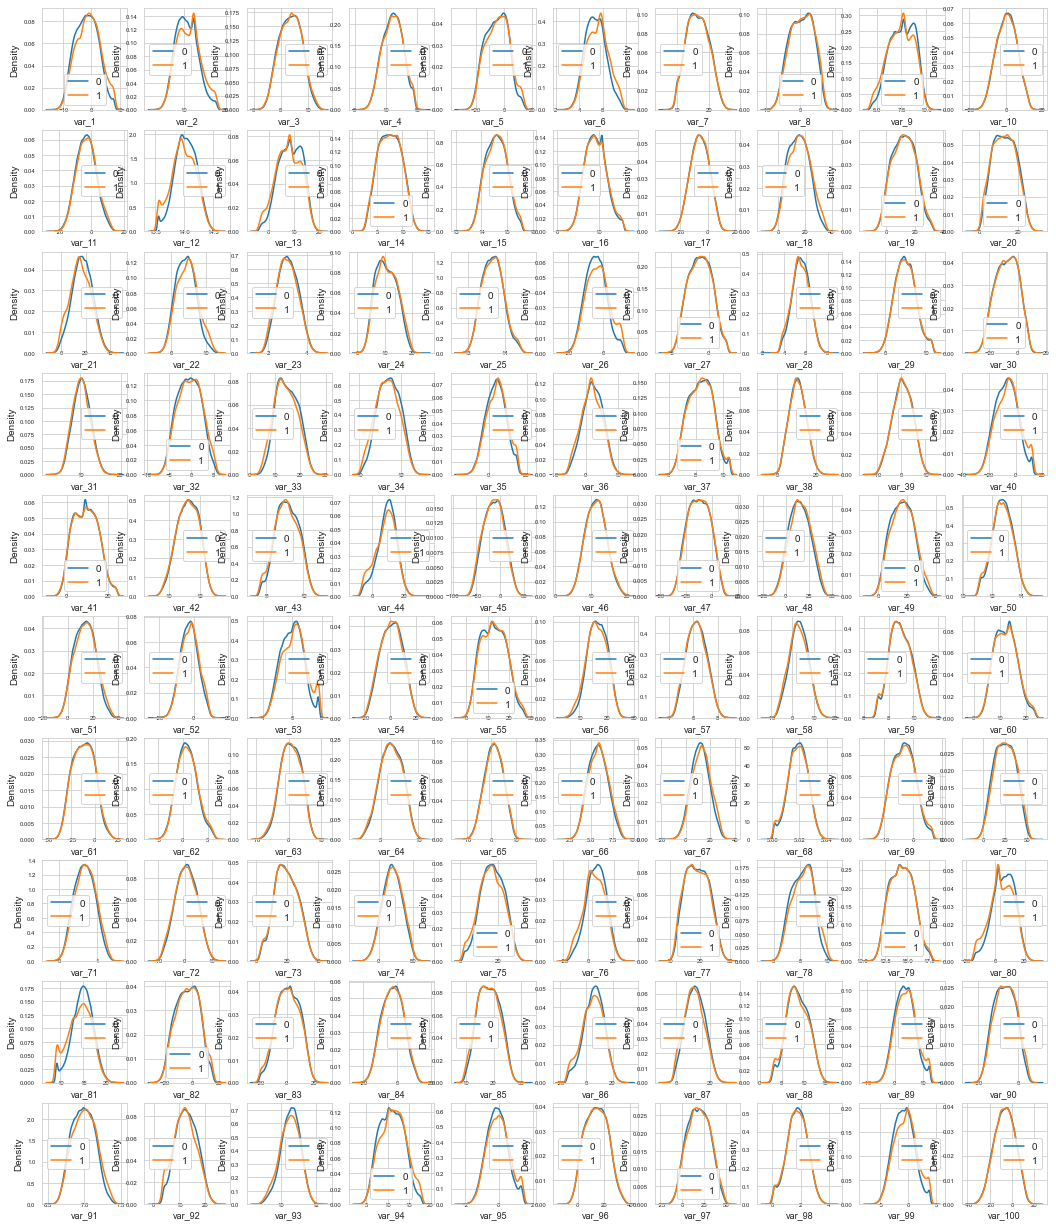

In [13]:
t0 = Data.loc[Data['target'] == 0]
t1 = Data.loc[Data['target'] == 1]
features = Data.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)

first 100 values are displayed in the following cell

<Figure size 432x288 with 0 Axes>

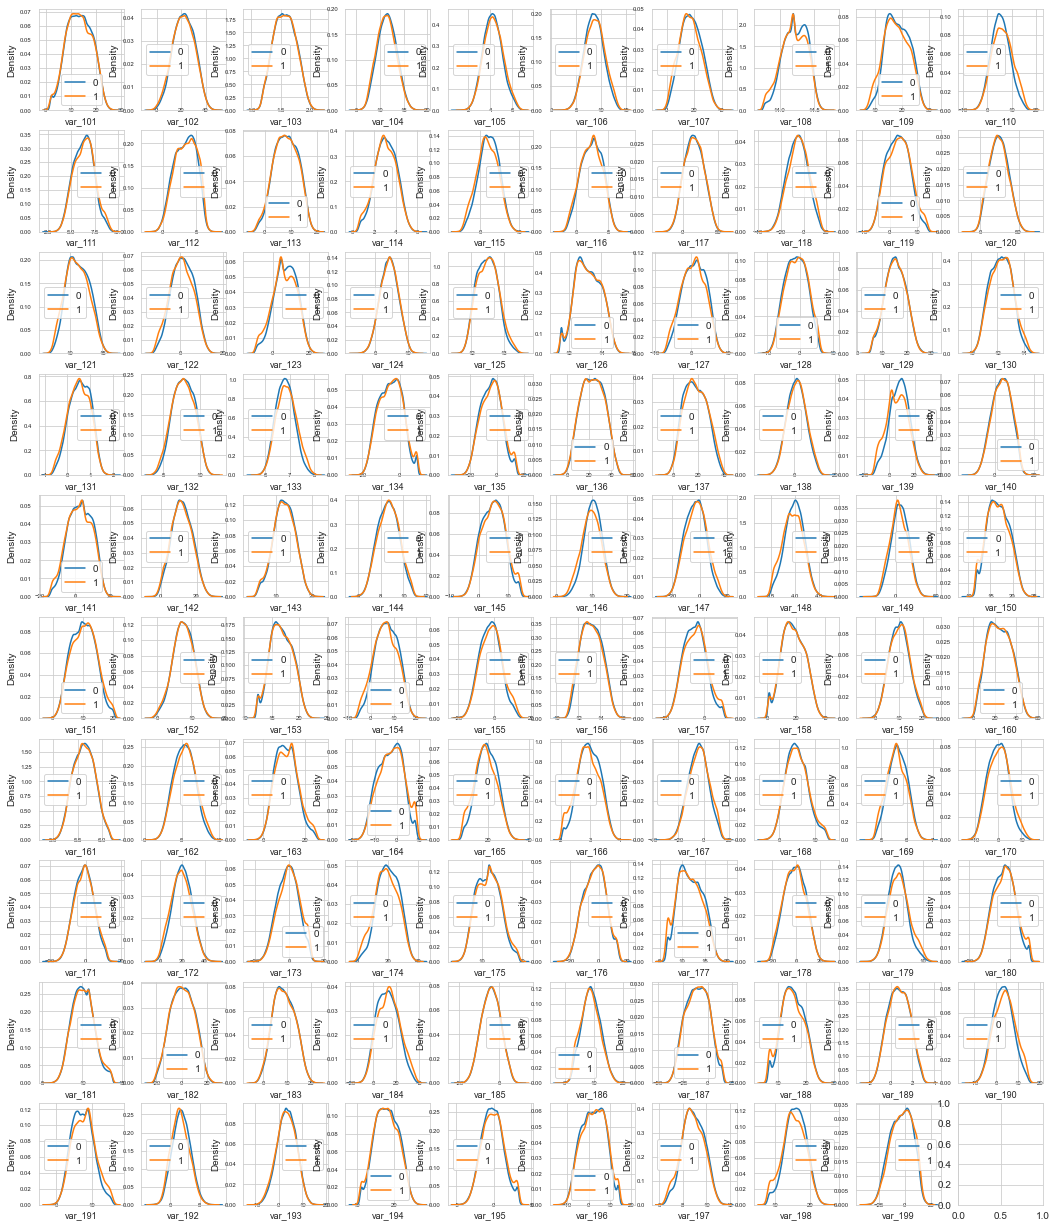

In [14]:
features = Data.columns.values[102:202]
plot_feature_distribution(t0 , t1 , '0', '1', features)

In [15]:
x=Data.loc[:,Data.columns!="target"]

In [16]:
y=Data.loc[:,Data.columns=="target"]

## outlier Detection

In [17]:
def tukeys_method(df, variable):
    
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    
    
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []

    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)

    return outliers_prob
 
def percent_outliers(df):
    no_outliers = True
    outlier_col = []
    sum_outliers = {}
    for col in df.columns:
        probable_outliers = tukeys_method(df, col)
        sum_outliers[col] = len(probable_outliers)
        if len(probable_outliers)>0:
            outlier_col.append(col)
            no_outliers= False
    if no_outliers:
        return "No outliers in Data"
    else:
        return sum_outliers

In [18]:
percent_outliers(x)

'No outliers in Data'

### lets check the distribution of target value in train data set.

<AxesSubplot:xlabel='target', ylabel='count'>

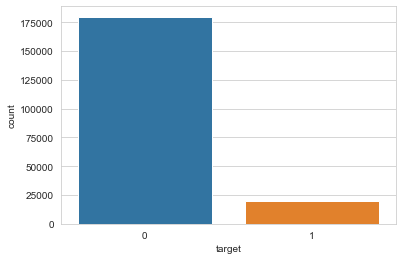

In [19]:
sns.countplot(Data['target'])

In [20]:
print('there are {}% target value with 1'.format(100*Data['target'].value_counts()[1]/Data.shape[0]))

there are 10.049% target value with 1


## Correlation Analysis of the data

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42,stratify=y)

In [22]:
def correl(X_train):
    cor = X_train.corr()
    corrm = np.corrcoef(X_train.transpose())
    corr = corrm - np.diagflat(corrm.diagonal())
    print("max corr:",corr.max(), ", min corr: ", corr.min())
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    high_cor = c1[c1.values!=1]
            
    thresh = 0.95
    return high_cor[high_cor>thresh]
correl(Data)

max corr: 0.06673084561268289 , min corr:  -0.08091733227447391


Series([], dtype: float64)

The max correlation is 0.0667 and min is -0.0809. Let's dive deeper into the correlations

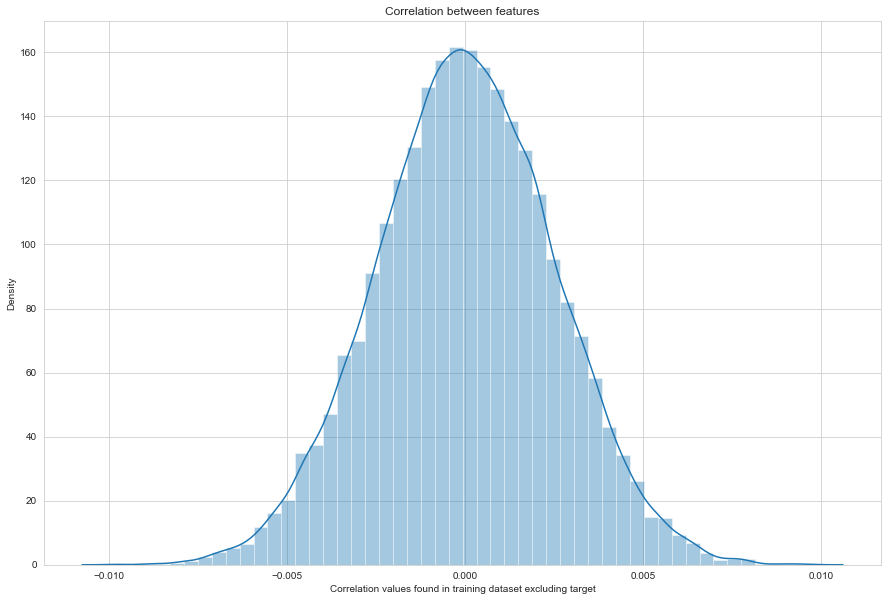

In [25]:
train_cor = Data.drop(["target"], axis=1).corr()
train_cor = train_cor.values.flatten()
train_cor = train_cor[train_cor != 1]
plt.figure(figsize=(15,10))
sns.distplot(train_cor)
plt.xlabel("Correlation values found in training dataset excluding target")
plt.ylabel("Density")
plt.title("Correlation between features")
plt.show()

Important thing to note is that these correlations are all very small and the corerelations also follow normal distribution. This is for the correlations between the 200 features and the target which is mostly between +0.05 and -0.05. For the correlations between the features themselves they are also waek being mostly between +0.005 and -0.005. There are NO strong correlation hence, feature reduction either by combining features or dropping features will be difficult.

## scaleing the data

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)

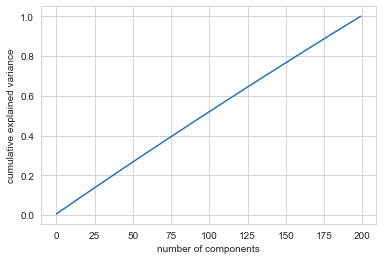

In [27]:
from sklearn.decomposition import PCA
pca = PCA().fit(scaled_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


All 100 variables needed to explain 100% of variance, hence the data must be PCA of some other larger dataset and we are more sure that feature reduction would not be a good approach

## MODELLING

#### LogisticRegression

In [29]:
from sklearn.linear_model import LogisticRegression


clf_lr = LogisticRegression(random_state=0,class_weight="balanced").fit(X_train, y_train)

preds_lr = clf_lr.predict(X_test
                         )
print(classification_report(y_test, preds_lr))

print('AUC of test: ',roc_auc_score(y_test, preds_lr ));

print(confusion_matrix(y_test,preds_lr))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86     35980
           1       0.28      0.76      0.40      4020

    accuracy                           0.77     40000
   macro avg       0.62      0.77      0.63     40000
weighted avg       0.90      0.77      0.82     40000

AUC of test:  0.7680247318161831
[[27933  8047]
 [  966  3054]]


### Naive Bayes

In [32]:
from sklearn.utils import class_weight

sample = class_weight.compute_sample_weight('balanced', y_train)
clf_nb = GaussianNB()
clf_nb.fit(X_train,y_train,sample_weight= sample)

GaussianNB()

In [33]:
preds_nb = clf_nb.predict(X_test)
print(classification_report(y_test, preds_nb))

print(confusion_matrix(y_test,preds_nb))

print('AUC of test: ',roc_auc_score(y_test, preds_nb ))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89     35980
           1       0.32      0.79      0.46      4020

    accuracy                           0.81     40000
   macro avg       0.65      0.80      0.67     40000
weighted avg       0.91      0.81      0.84     40000

[[29350  6630]
 [  830  3190]]
AUC of test:  0.8046316499769081


## Downsampling

In [34]:
df_0_downsampled = Data[Data["target"]==0].sample(len(Data[Data["target"]==1]), random_state=42)
df_1 = Data[Data["target"]==1]

df_downsampled = pd.concat([df_1, df_0_downsampled], ignore_index=True)

In [35]:
df_downsampled.target.value_counts()

1    20098
0    20098
Name: target, dtype: int64

In [39]:
X = df_downsampled.loc[:,df_downsampled.columns!='target']
Y = df_downsampled.loc[:,df_downsampled.columns=='target']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42,stratify=Y)

## logistic

In [42]:
clf_lr = LogisticRegression(random_state=42,class_weight="balanced").fit(X_train, y_train)
preds_lr = clf_lr.predict(X_test)
print(classification_report(y_test, preds_lr))

print('AUC of test: ',roc_auc_score(y_test, preds_lr ));


              precision    recall  f1-score   support

           0       0.77      0.78      0.77      4020
           1       0.78      0.76      0.77      4020

    accuracy                           0.77      8040
   macro avg       0.77      0.77      0.77      8040
weighted avg       0.77      0.77      0.77      8040

AUC of test:  0.7722636815920397


## Naive Bayes

In [52]:
clf_nb = GaussianNB()
clf_nb.fit(X_train,y_train)
preds_nb = clf_nb.predict(X_test)
print(classification_report(y_test, preds_nb))
print('AUC of test: ',roc_auc_score(y_test, preds_nb ));

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      4020
           1       0.82      0.80      0.81      4020

    accuracy                           0.81      8040
   macro avg       0.81      0.81      0.81      8040
weighted avg       0.81      0.81      0.81      8040

AUC of test:  0.8124378109452736


Thus downsampling slightly improves our metric

## Random forest

Since all features are important as dedeuced from PCA, let's try now boosting algorithms and check the performance

In [53]:
from sklearn.ensemble import RandomForestClassifier


In [54]:
rf = RandomForestClassifier(max_depth=22, max_features='log2', n_estimators=304)

In [56]:
rf.fit(X_train,y_train.values.ravel())

RandomForestClassifier(max_depth=22, max_features='log2', n_estimators=304)

In [57]:
preds_rf = rf.predict(X_test)
print(classification_report(y_test, preds_rf))

print('AUC of test: ',roc_auc_score(y_test, preds_rf ));

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      4020
           1       0.79      0.75      0.77      4020

    accuracy                           0.77      8040
   macro avg       0.77      0.77      0.77      8040
weighted avg       0.77      0.77      0.77      8040

AUC of test:  0.7742537313432837


Let's visualize important features from Random Forest

In [58]:
def plot_feature_importance(importance,names,model_type):


    feature_importance = np.array(importance)
    feature_names = np.array(names)

    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df = fi_df.loc[0:10,:]
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    
    plt.figure(figsize=(10,8))
    
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

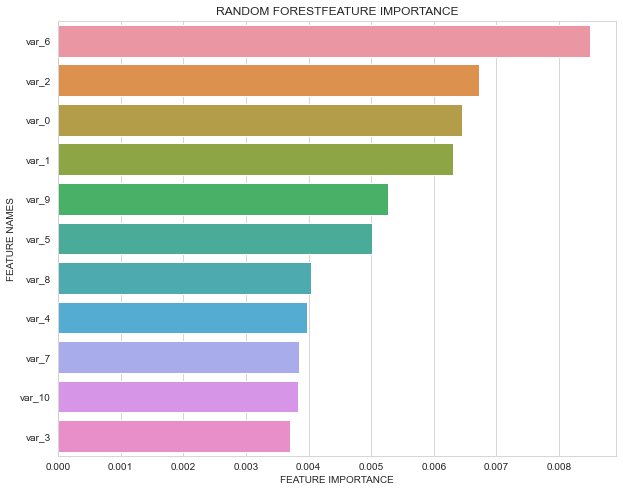

In [59]:
plot_feature_importance(rf.feature_importances_,X.columns,'RANDOM FOREST')

## XGboost

In [61]:
import xgboost as xgb
clf_xgb=xgb.XGBClassifier(colsample_bytree= 0.921,
 gamma= 8.3075,
 max_depth=3,
 min_child_weight=1,
 n_estimators=500,
 reg_alpha=3.0,
 reg_lambda=0.798730004926259)

In [62]:
clf_xgb.fit(X_train, y_train
       )

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.921,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=8.3075, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=3.0, reg_lambda=0.798730004926259, ...)

In [63]:
pred = clf_xgb.predict(X_test)
roc_auc_score(y_test, pred>0.5)

0.7973880597014925

## Here we have checked different models
## Final Conclusion of Given data sets 
## since the best score is with the Naive Bayes with score of 0.81